## 필요한 라이브러리 load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:\\Users\\JuhoSon\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding-Bold.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

# 데이터 총 merge

In [3]:
# GS 데이터 Load
df_gs_nowon = pd.read_csv('../data/innovation/Merge_data/df_gs_nowon.csv')
df_gs_jongro = pd.read_csv('../data/innovation/Merge_data/df_gs_jongro.csv')
df_gs_nowon = df_gs_nowon.astype(int)
df_gs_jongro = df_gs_jongro.astype(int)

# 신한 데이터 Load
df_card_nowon = pd.read_csv('../data/innovation/Merge_data/df_shinhan_nowon.csv')
df_card_jongro = pd.read_csv('../data/innovation/Merge_data/df_shinhan_jongro.csv')

# SKT 데이터 load
df_skt_nowon = pd.read_csv('../data/innovation/Merge_data/df_skt_nowon.csv')
df_skt_jongro = pd.read_csv('../data/innovation/Merge_data/df_skt_jongro.csv')

# 미세먼지 데이터 Load
df_asos_nowon = pd.read_csv('../data/innovation/Merge_data/df_asos_nowon.csv')
df_asos_jongro = pd.read_csv('../data/innovation/Merge_data/df_asos_jongro.csv')

In [12]:
df_asos_nowon.shape, df_skt_nowon.shape, df_card_nowon.shape, df_gs_nowon.shape

((365, 8), (365, 4), (365, 92), (365, 8))

In [14]:
df_asos_nowon.drop(['DATE', 'GU_NM'], axis=1, inplace=True)
df_asos_jongro.drop(['DATE', 'GU_NM'], axis=1, inplace=True)

In [4]:
df_card_nowon.head()

,age20숙박,age20레저용품,age20레저업소,age20문화취미,age20가구,age20전기,age20주방,age20연료,age20광학,age20가전,...,age50신변잡화,age50서적문구,age50사무통신,age50자동차판매,age50자동차정비,age50의료기관,age50보건위생,age50요식업소,age50음료식품,age50수리서비스
0,432.0,203.0,7993.0,1551.0,21.0,NaN,NaN,498.0,29.0,25.0,...,72.0,760.0,NaN,NaN,58.0,978.0,1877.0,14351.0,2763.0,99.0
1,105.0,131.0,5367.0,791.0,NaN,NaN,NaN,470.0,63.0,70.0,...,140.0,687.0,43.0,NaN,264.0,8666.0,1307.0,13421.0,3256.0,337.0
2,87.0,126.0,5656.0,526.0,NaN,NaN,18.0,384.0,42.0,43.0,...,107.0,669.0,25.0,NaN,241.0,7405.0,1381.0,13933.0,3392.0,276.0
3,151.0,165.0,5300.0,534.0,NaN,NaN,NaN,308.0,80.0,74.0,...,107.0,659.0,NaN,NaN,198.0,6935.0,1335.0,14271.0,3537.0,347.0
4,187.0,109.0,6001.0,729.0,NaN,NaN,NaN,312.0,89.0,60.0,...,76.0,549.0,29.0,NaN,149.0,6381.0,1278.0,13619.0,3470.0,140.0


In [15]:
# 인덱스를 datetime으로 넣어서 시계열 데이터로 변경
dateIdx = pd.date_range('2018-04-01', '2019-03-31')

df_asos_nowon = df_asos_nowon.set_index(dateIdx)
df_skt_nowon = df_skt_nowon.set_index(dateIdx)
df_gs_nowon = df_gs_nowon.set_index(dateIdx)
df_card_nowon = df_card_nowon.set_index(dateIdx)

df_asos_jongro = df_asos_jongro.set_index(dateIdx)
df_skt_jongro = df_skt_jongro.set_index(dateIdx)
df_gs_jongro = df_gs_jongro.set_index(dateIdx)
df_card_jongro = df_card_jongro.set_index(dateIdx)

In [16]:
df_total_nowon = df_card_nowon.merge(df_skt_nowon, on=df_card_nowon.index).set_index('key_0') # 신한 데이터에 date를 중심으로 SKT 데이터 merge
df_total_nowon = df_total_nowon.merge(df_gs_nowon, on=df_total_nowon.index).set_index('key_0') # 신한+SKT 데이터에 date를 중심으로 GS 데이터 merge
df_total_nowon = df_total_nowon.merge(df_asos_nowon, on=df_total_nowon.index).set_index('key_0') # 신한+SKT+GS 데이터에 date를 중심으로 미세먼지 데이터 merge

df_total_nowon.index.name = 'DATE' # index 이름 변경

df_total_jongro = df_card_jongro.merge(df_skt_jongro, on=df_card_jongro.index).set_index('key_0') # 신한 데이터에 date를 중심으로 SKT 데이터 merge
df_total_jongro = df_total_jongro.merge(df_gs_jongro, on=df_total_jongro.index).set_index('key_0') # 신한+SKT 데이터에 date를 중심으로 GS 데이터 merge
df_total_jongro = df_total_jongro.merge(df_asos_jongro, on=df_total_jongro.index).set_index('key_0') # 신한+SKT+GS 데이터에 date를 중심으로 미세먼지 데이터 merge

df_total_jongro.index.name = 'DATE' # index 이름 변경

In [17]:
df_total_nowon.columns

Index(['age20숙박', 'age20레저용품', 'age20레저업소', 'age20문화취미', 'age20가구', 'age20전기',
       'age20주방', 'age20연료', 'age20광학', 'age20가전',
       ...
       'LCLS_50_P', 'LCLS_60_P', 'LCLS_70_P', 'LCLS_80_P', 'pm10', 'pm25',
       'humi', 'temp', 'CONTENT', '강수량(mm)'],
      dtype='object', length=110)

In [18]:
df_total_jongro.columns

Index(['age20숙박', 'age20레저용품', 'age20레저업소', 'age20문화취미', 'age20가구', 'age20전기',
       'age20주방', 'age20연료', 'age20광학', 'age20가전',
       ...
       'LCLS_50_P', 'LCLS_60_P', 'LCLS_70_P', 'LCLS_80_P', 'pm10', 'pm25',
       'humi', 'temp', 'CONTENT', '강수량(mm)'],
      dtype='object', length=110)

In [19]:
AMT_list = ['accum', 'leisure goods','leisure busi', 'culture', 'furniture', 'electronic', 'kitchen', 'fuel', 'optic', 'Appliances', 
            'circul', 'cloth', 'textile', 'stuff','book', 'affair', 'car sell', 'car repair', 'medical', 'public health', 'food',
            'grocery', 'repair survice']

age_list = ['age20', 'age30', 'age40', 'age50']

base_cols = ['LCLS_10_P', 'LCLS_20_P', 'LCLS_30_P', 'LCLS_40_P', 'LCLS_50_P', 'LCLS_60_P', 'LCLS_70_P', 'LCLS_80_P', 
             'pm10', 'pm25', 'humi', 'temp', 'CONTENT', 'rain']

In [20]:
age20 = ['age20accum', 'age20leisure goods', 'age20leisure busi', 'age20culture', 'age20furniture', 'age20electronic', 'age20kitchen', 
         'age20fuel', 'age20optic', 'age20Appliances', 'age20circul', 'age20cloth', 'age20textile', 'age20stuff', 'age20book', 
         'age20affair', 'age20car sell', 'age20car repair', 'age20medical', 'age20public health', 'age20food', 'age20grocery', 
         'age20repair survice']

age30 = ['age30accum', 'age30leisure goods', 'age30leisure busi', 'age30culture', 'age30furniture', 'age30electronic', 'age30kitchen', 
         'age30fuel', 'age30optic', 'age30Appliances', 'age30circul', 'age30cloth', 'age30textile', 'age30stuff', 'age30book', 
         'age30affair', 'age30car sell', 'age30car repair', 'age30medical', 'age30public health', 'age30food', 'age30grocery', 
         'age30repair survice']

age40 = ['age40accum', 'age40leisure goods', 'age40leisure busi', 'age40culture', 'age40furniture', 'age40electronic', 'age40kitchen', 
         'age40fuel', 'age40optic', 'age40Appliances', 'age40circul', 'age40cloth', 'age40textile', 'age40stuff', 'age40book', 
         'age40affair', 'age40car sell', 'age40car repair', 'age40medical', 'age40public health', 'age40food', 'age40grocery', 
         'age40repair survice']

age50 = ['age50accum', 'age50leisure goods', 'age50leisure busi', 'age50culture', 'age50furniture', 'age50electronic', 'age50kitchen', 
         'age50fuel', 'age50optic', 'age50Appliances', 'age50circul', 'age50cloth', 'age50textile', 'age50stuff', 'age50book', 
         'age50affair', 'age50car sell', 'age50car repair', 'age50medical', 'age50public health', 'age50food', 'age50grocery', 
         'age50repair survice']

In [21]:
df_total_nowon.columns = age20 + age30 + age40 + age50 + age_list + base_cols
df_total_jongro.columns = age20 + age30 + age40 + age50 + age_list + base_cols

In [22]:
age20_cols = ['age20'+i for i in AMT_list]+['age20']+base_cols  # 23개업종 1개인구 8개카테고리, 6개기상데이터 총 38
age30_cols = ['age30'+i for i in AMT_list]+['age30']+base_cols
age40_cols = ['age40'+i for i in AMT_list]+['age40']+base_cols
age50_cols = ['age50'+i for i in AMT_list]+['age50']+base_cols

In [23]:
df_20_nowon = df_total_nowon[age20_cols]
df_30_nowon = df_total_nowon[age30_cols]
df_40_nowon = df_total_nowon[age40_cols]
df_50_nowon = df_total_nowon[age50_cols]

df_20_jongro = df_total_jongro[age20_cols]
df_30_jongro = df_total_jongro[age30_cols]
df_40_jongro = df_total_jongro[age40_cols]
df_50_jongro = df_total_jongro[age50_cols]

In [24]:
# 각각의 나이대 별 매출에서 NULL값이 있는지 확인

print("========================노원구========================")
print("20대 : ", df_20_nowon.columns[np.where(df_20_nowon.isnull().sum()[:'LCLS_80_P'] != 0)[0]])
print("30대 : ", df_30_nowon.columns[np.where(df_30_nowon.isnull().sum()[:'LCLS_80_P'] != 0)[0]])
print("40대 : ", df_40_nowon.columns[np.where(df_40_nowon.isnull().sum()[:'LCLS_80_P'] != 0)[0]])
print("50대 : ", df_50_nowon.columns[np.where(df_50_nowon.isnull().sum()[:'LCLS_80_P'] != 0)[0]])

print("\n========================종로구========================")
print("20대 : ", df_20_jongro.columns[np.where(df_20_jongro.isnull().sum()[:'LCLS_80_P'] != 0)[0]])
print("30대 : ", df_30_jongro.columns[np.where(df_30_jongro.isnull().sum()[:'LCLS_80_P'] != 0)[0]])
print("40대 : ", df_40_jongro.columns[np.where(df_40_jongro.isnull().sum()[:'LCLS_80_P'] != 0)[0]])
print("50대 : ", df_50_jongro.columns[np.where(df_50_jongro.isnull().sum()[:'LCLS_80_P'] != 0)[0]])

### 각각의 나이대에서 전부 NULL 값이 다른 것을 알 수 있음

========================노원구========================
20대 :  Index(['age20furniture', 'age20electronic', 'age20kitchen', 'age20optic',
       'age20Appliances', 'age20textile', 'age20affair', 'age20car sell',
       'age20car repair'],
      dtype='object')
30대 :  Index(['age30accum', 'age30furniture', 'age30electronic', 'age30kitchen',
       'age30optic', 'age30Appliances', 'age30cloth', 'age30textile',
       'age30affair', 'age30car sell', 'age30repair survice'],
      dtype='object')
40대 :  Index(['age40furniture', 'age40electronic', 'age40kitchen', 'age40optic',
       'age40Appliances', 'age40textile', 'age40affair', 'age40car sell',
       'age40repair survice'],
      dtype='object')
50대 :  Index(['age50accum', 'age50leisure goods', 'age50furniture', 'age50electronic',
       'age50kitchen', 'age50optic', 'age50Appliances', 'age50textile',
       'age50affair', 'age50car sell', 'age50car repair',
       'age50repair survice'],
      dtype='object')

========================종로구==

# 놓친 결측치 처리
* 신한 해당 날짜에 업종코드가 없는 경우 결측으로 잡히기때문에 매출이 없는 것을 의미하는 0으로.

In [25]:
# 각 나이대 별 null columns이 얼마나 있는 지 확인
age20_nowon_null = df_20_nowon.isnull().sum()[['age20furniture', 'age20electronic', 'age20kitchen', 'age20optic',
                                      'age20Appliances', 'age20textile', 'age20affair', 'age20car sell','age20car repair']]

age30_nowon_null = df_30_nowon.isnull().sum()[['age30accum', 'age30furniture', 'age30electronic', 'age30kitchen', 'age30optic', 'age30Appliances', 
                                      'age30cloth', 'age30textile', 'age30affair', 'age30car sell', 'age30repair survice']]

age40_nowon_null = df_40_nowon.isnull().sum()[['age40furniture', 'age40electronic', 'age40kitchen', 'age40optic', 'age40Appliances', 'age40textile', 
                                      'age40affair', 'age40car sell', 'age40repair survice']]

age50_nowon_null = df_50_nowon.isnull().sum()[['age50accum', 'age50leisure goods', 'age50furniture', 'age50electronic', 'age50kitchen', 'age50optic', 
                                      'age50Appliances', 'age50textile', 'age50affair', 'age50car sell', 'age50car repair','age50repair survice']]


age20_jongro_null = df_20_jongro.isnull().sum()[['age20furniture', 'age20electronic', 'age20kitchen', 'age20fuel',
       'age20optic', 'age20Appliances', 'age20textile', 'age20affair',
       'age20car sell', 'age20repair survice']]

age30_jongro_null = df_30_jongro.isnull().sum()[['age30furniture', 'age30electronic', 'age30kitchen', 'age30optic',
       'age30Appliances', 'age30textile', 'age30affair', 'age30car sell',
       'age30repair survice']]

age40_jongro_null = df_40_jongro.isnull().sum()[['age40furniture', 'age40electronic', 'age40kitchen', 'age40optic',
       'age40Appliances', 'age40textile', 'age40affair', 'age40car sell',
       'age40repair survice']]

age50_jongro_null = df_50_jongro.isnull().sum()[['age50furniture', 'age50electronic', 'age50kitchen', 'age50optic',
       'age50Appliances', 'age50textile', 'age50affair', 'age50car sell',
       'age50repair survice']]

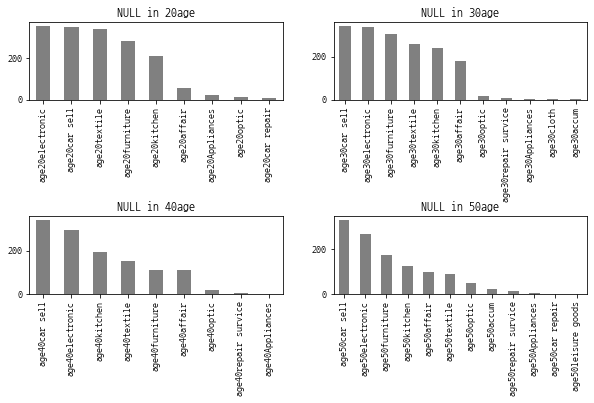

In [26]:
fig, axes = plt.subplots(2, 2)
age20_nowon_null.sort_values(ascending = False).plot(kind = 'bar', ax = axes[0, 0], title = 'NULL in 20age', figsize = (10, 5), color = 'grey')
age30_nowon_null.sort_values(ascending = False).plot(kind = 'bar', ax = axes[0, 1], title = 'NULL in 30age', figsize = (10, 5), color = 'grey')
age40_nowon_null.sort_values(ascending = False).plot(kind = 'bar', ax = axes[1, 0], title = 'NULL in 40age', figsize = (10, 5), color = 'grey')
age50_nowon_null.sort_values(ascending = False).plot(kind = 'bar', ax = axes[1, 1], title = 'NULL in 50age', figsize = (10, 5), color = 'grey')

plt.subplots_adjust(hspace = 1.5)

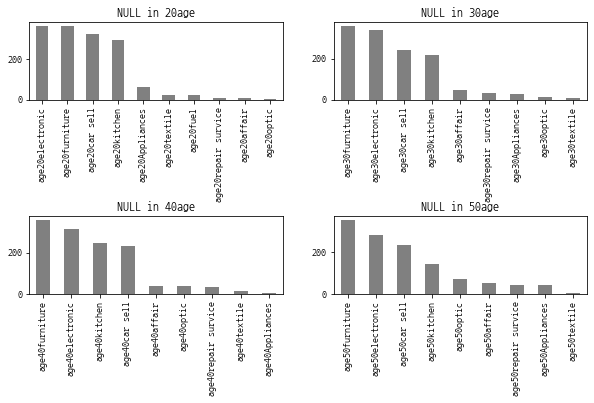

In [27]:
fig, axes = plt.subplots(2, 2)
age20_jongro_null.sort_values(ascending = False).plot(kind = 'bar', ax = axes[0, 0], title = 'NULL in 20age', figsize = (10, 5), color = 'grey')
age30_jongro_null.sort_values(ascending = False).plot(kind = 'bar', ax = axes[0, 1], title = 'NULL in 30age', figsize = (10, 5), color = 'grey')
age40_jongro_null.sort_values(ascending = False).plot(kind = 'bar', ax = axes[1, 0], title = 'NULL in 40age', figsize = (10, 5), color = 'grey')
age50_jongro_null.sort_values(ascending = False).plot(kind = 'bar', ax = axes[1, 1], title = 'NULL in 50age', figsize = (10, 5), color = 'grey')

plt.subplots_adjust(hspace = 1.5)

In [29]:
df_20_nowon.fillna(0, inplace = True)
df_30_nowon.fillna(0, inplace = True)
df_40_nowon.fillna(0, inplace = True)
df_50_nowon.fillna(0, inplace = True)

df_20_jongro.fillna(0, inplace = True)
df_30_jongro.fillna(0, inplace = True)
df_40_jongro.fillna(0, inplace = True)
df_50_jongro.fillna(0, inplace = True)

C:\Users\JuhoSon\Miniconda3\envs\2019BigC\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [30]:
print("========================노원구========================")
print("20대 : ", df_20_nowon.columns[np.where(df_20_nowon.isnull().sum()[:'LCLS_80_P'] != 0)[0]])
print("30대 : ", df_30_nowon.columns[np.where(df_30_nowon.isnull().sum()[:'LCLS_80_P'] != 0)[0]])
print("40대 : ", df_40_nowon.columns[np.where(df_40_nowon.isnull().sum()[:'LCLS_80_P'] != 0)[0]])
print("50대 : ", df_50_nowon.columns[np.where(df_50_nowon.isnull().sum()[:'LCLS_80_P'] != 0)[0]])

print("\n========================종로구========================")
print("20대 : ", df_20_jongro.columns[np.where(df_20_jongro.isnull().sum()[:'LCLS_80_P'] != 0)[0]])
print("30대 : ", df_30_jongro.columns[np.where(df_30_jongro.isnull().sum()[:'LCLS_80_P'] != 0)[0]])
print("40대 : ", df_40_jongro.columns[np.where(df_40_jongro.isnull().sum()[:'LCLS_80_P'] != 0)[0]])
print("50대 : ", df_50_jongro.columns[np.where(df_50_jongro.isnull().sum()[:'LCLS_80_P'] != 0)[0]])

========================노원구========================
20대 :  Index([], dtype='object')
30대 :  Index([], dtype='object')
40대 :  Index([], dtype='object')
50대 :  Index([], dtype='object')

========================종로구========================
20대 :  Index([], dtype='object')
30대 :  Index([], dtype='object')
40대 :  Index([], dtype='object')
50대 :  Index([], dtype='object')


In [31]:
df_20_nowon.to_csv('../data/innovation/Merge_data/df_age20_nowon.csv', index=False)
df_30_nowon.to_csv('../data/innovation/Merge_data/df_age30_nowon.csv', index=False)
df_40_nowon.to_csv('../data/innovation/Merge_data/df_age40_nowon.csv', index=False)
df_50_nowon.to_csv('../data/innovation/Merge_data/df_age50_nowon.csv', index=False)

df_20_jongro.to_csv('../data/innovation/Merge_data/df_age20_jongro.csv', index=False)
df_30_jongro.to_csv('../data/innovation/Merge_data/df_age30_jongro.csv', index=False)
df_40_jongro.to_csv('../data/innovation/Merge_data/df_age40_jongro.csv', index=False)
df_50_jongro.to_csv('../data/innovation/Merge_data/df_age50_jongro.csv', index=False)